# About Dataset:
Dataset was taken from Kaggle web-site [zomato restaurants](https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants) in order to perform an Exploratory Data Analysis.    
Data for this dataset was taken from an Indian multinational restaurant aggregator and food delivery company Zomato for **Bangalore** - capital and largest city of the Indian state of Karnataka.  

In [1]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
zomato_df = pd.read_csv('zomato.csv')

In [3]:
df = zomato_df.copy()

In [4]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.shape

(51717, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

---

# Data Cleaning
- Remove unnecessary columns
- Rename columns 
- Check for duplicates 
- Check for missing values
- Format individual columns
- Change types of columns

---

### Removing unnecessary columns

In [7]:
#If we look at df.head in the code above, we can observe that for MENU_ITEM column all values are '[]' which equals to NaN, in this cell I count how many rows have same value in whole dataset.

df['menu_item'][df['menu_item'] == '[]'].count()

39617

In [8]:
# For EDA, columns such as url, phone, reviews_list are useless 
# We could have saved 'menu_item' and 'dish_liked' columns, but they have too many missing values 
# We will use locality info in 'listed_in(city)' column, so we don't need location and address columns
# We will use restaurant type in 'listed_in(type)' coluumn, so we don't need rest_type column

columns_to_drop = ['url', 'address', 'phone','location','dish_liked', 'reviews_list', 'menu_item','rest_type']
df.drop(columns = columns_to_drop, inplace= True)

In [9]:
df.head(1)

,name,online_order,book_table,rate,votes,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari


### Renaming columns

In [10]:
df.rename(columns={'name':'restaurant','rate':'rating','listed_in(type)':'restaurant_type','listed_in(city)': 'locality','approx_cost(for two people)':'average_cost'},inplace=True)

In [11]:
df

,restaurant,online_order,book_table,rating,votes,cuisines,average_cost,restaurant_type,locality
0,Jalsa,Yes,Yes,4.1/5,775,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Continental,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,Finger Food,"2,500",Pubs and bars,Whitefield


### Formatting individual columns

##### Rate column

In [12]:
df.rating.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [13]:
df.rating.replace('NEW', np.nan, inplace = True)
df.rating.replace('-', np.nan, inplace = True)

In [14]:
X = df.rating
X = X.astype(str)
X = X.apply(lambda x: x.replace('/5','').rstrip())
X = X.apply(lambda x: float(x))
X.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rating, dtype: float64

In [15]:
df.rating = X
df.head()

,restaurant,online_order,book_table,rating,votes,cuisines,average_cost,restaurant_type,locality
0,Jalsa,Yes,Yes,4.1,775,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,"North Indian, Rajasthani",600,Buffet,Banashankari


In [16]:
df.rating.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

##### Resaturant column

In [17]:
df['restaurant']=df['restaurant'].str.replace('[Ãx][^A-Za-z]+','',regex=True)

### Checking for missing values

In [18]:
df.isna().sum()

restaurant             0
online_order           0
book_table             0
rating             10052
votes                  0
cuisines              45
average_cost         346
restaurant_type        0
locality               0
dtype: int64

In [19]:
df.dropna(inplace = True)

### Checking for duplicates

In [20]:
df[df.duplicated(keep = False) == True].sort_values(by='restaurant')

,restaurant,online_order,book_table,rating,votes,cuisines,average_cost,restaurant_type,locality
31305,154 Breakfast Club,Yes,Yes,4.0,1515,"Cafe, Continental",900,Dine-out,Koramangala 5th Block
31306,154 Breakfast Club,Yes,Yes,4.0,1515,"Cafe, Continental",900,Dine-out,Koramangala 5th Block
11705,99 Pancakes,Yes,No,4.1,41,"Desserts, Ice Cream",150,Delivery,Church Street
12350,99 Pancakes,Yes,No,4.1,41,"Desserts, Ice Cream",150,Delivery,Church Street
43823,Alchemy - The Chancery Pavilion,No,Yes,4.3,485,Modern Indian,"2,000",Drinks & nightlife,MG Road
...,...,...,...,...,...,...,...,...,...
24576,Victoria Terminus,Yes,No,2.9,54,"Fast Food, Maharashtrian, Rolls",250,Delivery,Kalyan Nagar
12332,Vietnamese Kitchen,Yes,Yes,4.1,525,"Chinese, Vietnamese, Momos, Thai",800,Delivery,Church Street
11841,Vietnamese Kitchen,Yes,Yes,4.1,525,"Chinese, Vietnamese, Momos, Thai",800,Delivery,Church Street
9464,Vyanjan,Yes,No,3.9,201,"North Indian, Street Food",300,Delivery,BTM


In [21]:
df.drop_duplicates(inplace = True)

In [22]:
df.shape

(41337, 9)

### Changing data-types of columns

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41337 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   restaurant       41337 non-null  object 
 1   online_order     41337 non-null  object 
 2   book_table       41337 non-null  object 
 3   rating           41337 non-null  float64
 4   votes            41337 non-null  int64  
 5   cuisines         41337 non-null  object 
 6   average_cost     41337 non-null  object 
 7   restaurant_type  41337 non-null  object 
 8   locality         41337 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 3.2+ MB


In [24]:
df.average_cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '1,700', '1,350', '2,200', '1,400', '2,000', '1,800',
       '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400',
       '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600', '1,450',
       '70', '3,200', '240', '6,000', '1,050', '2,300', '4,100', '120',
       '5,000', '3,700', '1,650', '2,700', '4,500', '80'], dtype=object)

In [25]:
df['average_cost'] = df['average_cost'].str.replace(',', '').astype(float)

In [26]:
df.describe()

,rating,votes,average_cost
count,41337.000000,41337.000000,41337.000000
mean,3.700123,351.175823,602.944239
std,0.440599,882.052567,464.062590
min,1.800000,0.000000,40.000000
25%,3.400000,21.000000,300.000000
50%,3.700000,73.000000,500.000000
75%,4.000000,276.000000,700.000000
max,4.900000,16832.000000,6000.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41337 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   restaurant       41337 non-null  object 
 1   online_order     41337 non-null  object 
 2   book_table       41337 non-null  object 
 3   rating           41337 non-null  float64
 4   votes            41337 non-null  int64  
 5   cuisines         41337 non-null  object 
 6   average_cost     41337 non-null  float64
 7   restaurant_type  41337 non-null  object 
 8   locality         41337 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.2+ MB


In [28]:
df.head()

,restaurant,online_order,book_table,rating,votes,cuisines,average_cost,restaurant_type,locality
0,Jalsa,Yes,Yes,4.1,775,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,"North Indian, Rajasthani",600.0,Buffet,Banashankari


In [40]:
df.to_csv('clean_zomato.csv')

---

# Data Visualization
- Online order and Table booking
- Online order and Table booking vs Rating
- Average cost of the restaurant
- Best restaurants by rating and number of votes
- Most popular restaurant chains

---

### Online order and Table booking 

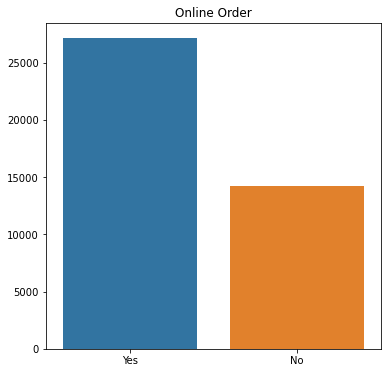

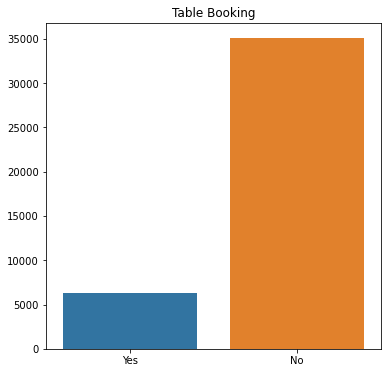

In [29]:
plt.figure(figsize= (6, 6))
sns.countplot(df, x= 'online_order')
plt.title('Online Order')
plt.xlabel(''), plt.ylabel('')
plt.show;

plt.figure(figsize= (6, 6))
sns.countplot(df, x= 'book_table')
plt.title('Table Booking')
plt.xlabel(''), plt.ylabel('')
plt.show;

> Here we can see that:  
- over **25000** restaurants accept online order   
- and about **15000** don't have online order
- **Vast majority** of restaurants **don't have table booking** option

---

### Online order and Table booking vs Rating

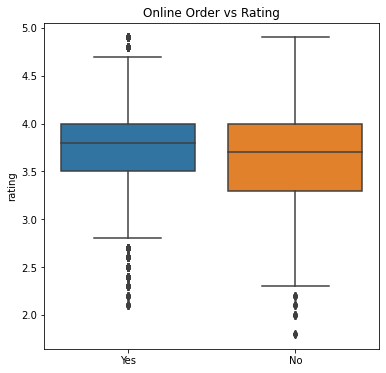

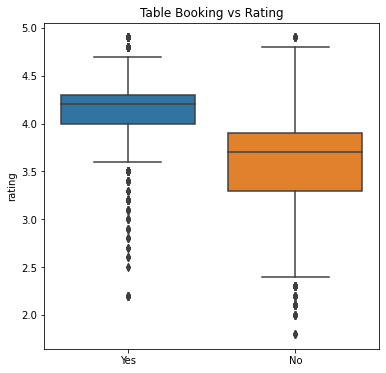

In [30]:
plt.figure(figsize= (6, 6))
sns.boxplot(df, x='online_order', y="rating")
plt.title('Online Order vs Rating')
plt.xlabel(''), plt.ylabel('rating')
plt.show;

plt.figure(figsize= (6, 6))
sns.boxplot(df, x='book_table', y="rating")
plt.title('Table Booking vs Rating')
plt.xlabel(''), plt.ylabel('rating')
plt.show;

- Restaurants that have online order have slightly higher average rating  
- Restaurants that have table booking option have much higher average rating

---

### Number of restaurants by their type

In [31]:
df1 = df.restaurant_type.value_counts()
df1.to_frame()

,restaurant_type
Delivery,20488
Dine-out,14110
Desserts,2714
Cafes,1511
Drinks & nightlife,1038
Buffet,846
Pubs and bars,630


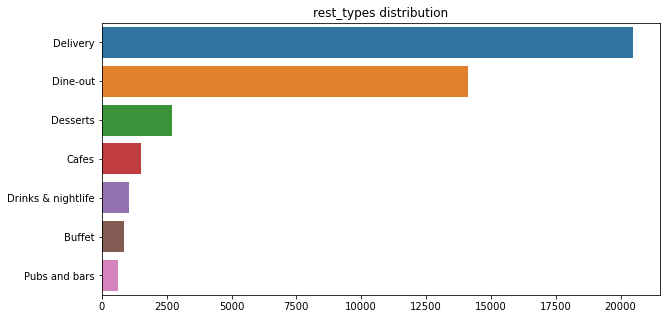

In [32]:
plt.figure(figsize= (10, 5))
sns.barplot(x = df1, y= df1.index)
plt.title('rest_types distribution')
plt.xlabel('');

- Most of the restaurants have type of **Delivery** or **Dine-out**

---

### Average cost of the restaurant

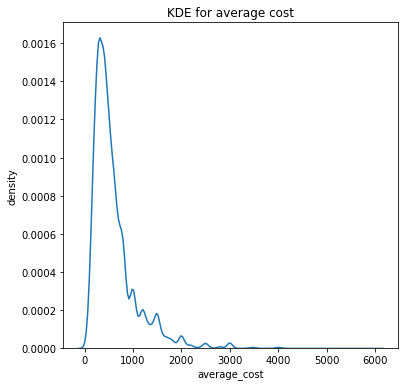

In [33]:
plt.figure(figsize= (6,6))
sns.kdeplot(df, x='average_cost')
plt.title('KDE for average cost')
plt.xlabel('average_cost'), plt.ylabel('density')
plt.show;

- If we look at the plot above we can see that most of the restaurants cost up to 1000

---

### Best restaurants by rating and number of votes

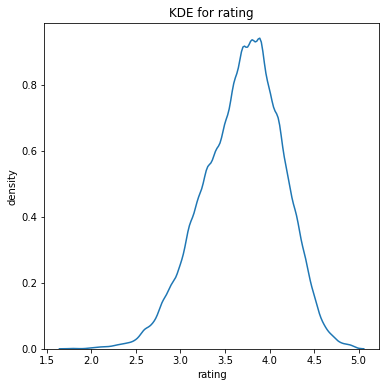

In [34]:
plt.figure(figsize= (6,6))
sns.kdeplot(df, x='rating')
plt.title('KDE for rating')
plt.xlabel('rating'), plt.ylabel('density')
plt.show;

- As we can see in KDE plot for rating most of the restaurants have rating between **3** and **4.5**

In [35]:
df.groupby('restaurant')['rating'].mean().sort_values(ascending = False).head(10).to_frame()

,rating
restaurant,
SantSpa Cuisine,4.900000
Asia Kitchen By Mainland China,4.900000
Byg Brewski Brewing Company,4.900000
Punjab Grill,4.871429
Belgian Waffle Factory,4.844828
Flechazo,4.800000
O.G. Variar & Sons,4.800000
The Pizza Bakery,4.800000
AB's - Absolute Barbecues,4.789474


In [36]:
df.groupby('restaurant')['votes'].mean().sort_values(ascending = False).head(10).to_frame()

,votes
restaurant,
Byg Brewski Brewing Company,16588.500000
Toit,14956.000000
The Black Pearl,9562.333333
Big Pitcher,9164.500000
Arbor Brewing Company,8396.545455
Prost Brew Pub,7860.900000
Church Street Social,7561.727273
Hoot,7257.000000
The Hole in the Wall Cafe,7124.875000


- The best restaurant by looking at number of votes and rating is **Byg Brewski Brewing Company** as it has **top 1 rating and top 1 votes**

---

### Most popular restaurant chains

In [37]:
df2 = df['restaurant'].value_counts().head(10)
df2

Cafe Coffee Day      86
Onesta               85
Empire Restaurant    69
Kanti Sweets         68
Five Star Chicken    68
Just Bake            67
Baskin Robbins       62
KFC                  60
Pizza Hut            60
Petoo                60
Name: restaurant, dtype: int64

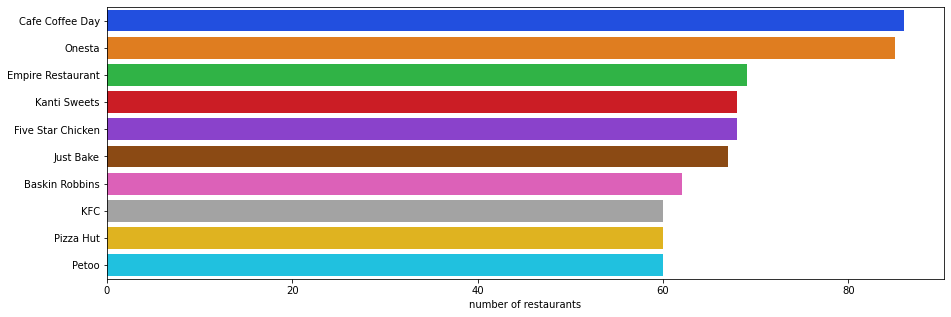

In [38]:
plt.figure(figsize= (15, 5))
sns.barplot(x = df2, y= df2.index, palette = 'bright')
plt.xlabel('number of restaurants')
plt.show;

- These are top 10 restaurants by number of branches in the city where we can see absolute liders: **Cafe Coffee Day** and **Onesta**